In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [8]:
traffic_data_str = """
Date,Visitors,PageViews
2025-07-01,1000,5000
2025-07-02,1200,6200
2025-07-03,N/A,5800
2025-07-04,1150,unknown
2025-07-05,1300,7000
"""
df_traffic = pd.read_csv(io.StringIO(traffic_data_str))

print("Original Messy Traffic Data:")
print(df_traffic)

print("\nInitial Data Info (from df_traffic.info()):")
df_traffic.info()

Original Messy Traffic Data:
         Date  Visitors PageViews
0  2025-07-01    1000.0      5000
1  2025-07-02    1200.0      6200
2  2025-07-03       NaN      5800
3  2025-07-04    1150.0   unknown
4  2025-07-05    1300.0      7000

Initial Data Info (from df_traffic.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5 non-null      object 
 1   Visitors   4 non-null      float64
 2   PageViews  5 non-null      object 
dtypes: float64(1), object(2)
memory usage: 252.0+ bytes


In [9]:
df_traffic['Visitors'] = pd.to_numeric(df_traffic['Visitors'], errors='coerce') 
df_traffic['Visitors'] = df_traffic['Visitors'].fillna(df_traffic['Visitors'].mean()) 

df_traffic['PageViews'] = pd.to_numeric(df_traffic['PageViews'], errors='coerce')
df_traffic['PageViews'] = df_traffic['PageViews'].fillna(df_traffic['PageViews'].mean())

df_traffic['Date'] = pd.to_datetime(df_traffic['Date'])

print("\nCleaned Traffic Data:")
print(df_traffic)
print("\nCleaned Data Info:")
df_traffic.info()



Cleaned Traffic Data:
        Date  Visitors  PageViews
0 2025-07-01    1000.0     5000.0
1 2025-07-02    1200.0     6200.0
2 2025-07-03    1162.5     5800.0
3 2025-07-04    1150.0     6000.0
4 2025-07-05    1300.0     7000.0

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5 non-null      datetime64[ns]
 1   Visitors   5 non-null      float64       
 2   PageViews  5 non-null      float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 252.0 bytes


In [12]:
df_traffic['Engagement_Rate'] = (df_traffic['PageViews']/ 
                                  df_traffic['Visitors']) * 100
print("\nTraffic Data with Engagement Rate:")
print(df_traffic)



Traffic Data with Engagement Rate:
        Date  Visitors  PageViews  Engagement_Rate
0 2025-07-01    1000.0     5000.0       500.000000
1 2025-07-02    1200.0     6200.0       516.666667
2 2025-07-03    1162.5     5800.0       498.924731
3 2025-07-04    1150.0     6000.0       521.739130
4 2025-07-05    1300.0     7000.0       538.461538


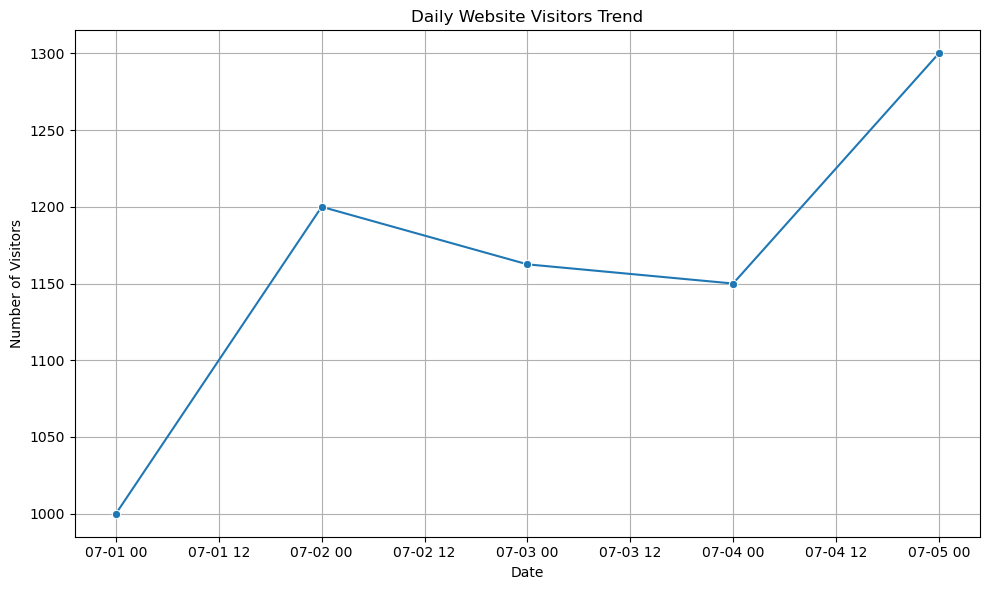

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Visitors', data=df_traffic, marker='o')
plt.title('Daily Website Visitors Trend')
plt.xlabel('Date')
plt.ylabel('Number of Visitors')
plt.grid(True)
plt.tight_layout()
plt.show()